In [1]:
!pip install -Uqq duckduckgo_search

In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *

In [3]:
def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [4]:
urls = search_images('orchid flower', max_images=1)
urls[0]

'https://inspirationseek.com/wp-content/uploads/2015/01/Beautiful-Orchid-Flower.jpg'

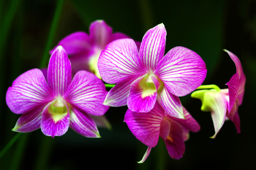

In [5]:
from fastdownload import download_url
dest = 'orchid.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

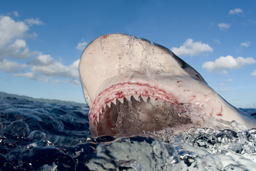

In [6]:
download_url(search_images('sharks', max_images=1)[0], 'shark.jpg', show_progress=False)
Image.open('shark.jpg').to_thumb(256,256)

In [8]:
searches = 'orchid','shark'
path = Path('orchid-classifer/isorchid')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o}'))
    sleep(10)  # Pause between searches to avoid over-loading server
    resize_images(path/o, max_size=400, dest=path/o)

In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

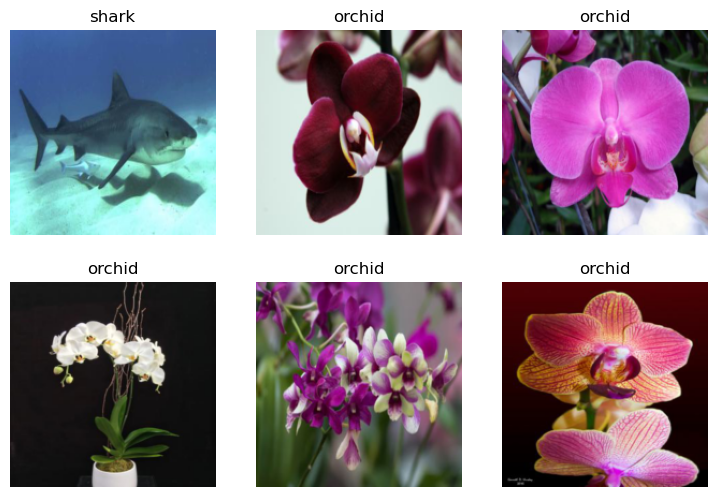

In [10]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

C:\Users\lawre\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\lawre\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\lawre/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.929853,0.002761,0.000000,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.032383,0.035763,0.017699,00:02
1,0.022441,0.012509,0.000000,00:01
2,0.016575,0.002305,0.000000,00:01


In [12]:
is_orchid,_,probs = learn.predict(PILImage.create('orchid.jpg'))
print(f"This is a: {is_orchid}.")
print(f"Probability it's a orchid: {probs[0]:.4f}")

This is a: orchid.
Probability it's a orchid: 0.9998
